# Project: Movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>  In this project we'll be analyzing data associated with the movies from 1960 to 2015.
>
> In particular, We'll be interested in finding trends among the genres which have the most popularity, genres with the most revenues, the average runtime for each genre and superstar according to an average movie rating.


In [1]:
# import statements for all of the packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline
# activating the seaborn 
sns.set()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


 to display all the columns i splited the table to two parts 


In [3]:
#the first 11 columns
df.head().iloc[:,11:]

,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# the 2nd 11 columns

df.head().iloc[:,:11]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car


In [5]:
# this returns a tuple of the dimensions of the dataframe

df.shape

(10866, 21)

In [6]:
# this returns the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
# this returns the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
# this returns useful descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
# the last few rows
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [11]:
# the number of null values in each column

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
# the number of null values of all the data

df.isnull().sum().sum(), (df.isnull().sum().sum()/df.count().sum())*100

(13434, 6.2555878408582926)

In [13]:
# the number of duplicated raws 
df.duplicated().sum()

1

### checking the  value when imdb_id  is null :
    so we find that no revenue that's why i descide to drop those 10 rows


In [14]:
# defining a imdb_null which contain all the raw which have imdb_id is NaN
imdb_null = df[df['imdb_id'].isnull()]

In [15]:
# The first 11 columns 
imdb_null.iloc[:,:11]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,sexuality|superhuman|superpower|making of|soci...
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,NaN
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,marvel comic|superhero|wolverine|hulk|norse my...
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,marvel comic|superhero|hulk|norse mythology|su...
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",NaN
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,NaN
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,NaN
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,portal|aperture
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,NaN
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,NaN


In [16]:
# The last 11 columns 

imdb_null.iloc[:,11:]

,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0




### Data Cleaning

#### drop dublicates


In [17]:
# drop dublicates

df.drop_duplicates(inplace=True)


#### removing the imdb_id null values

In [18]:
# Get names of indexes for which imdb_id is NaN
indexNames = df[df['imdb_id'].isnull()].index

# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)



In [19]:
# explore the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

## droping the unused columns

In [20]:

df.drop(['imdb_id', 'keywords', 'overview', 'release_date', 'homepage', 'tagline', 'production_companies','budget_adj','revenue_adj'],axis=1, inplace=True)

In [21]:
df.isnull().sum().sum()

137

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 12 columns):
id                10855 non-null int64
popularity        10855 non-null float64
budget            10855 non-null int64
revenue           10855 non-null int64
original_title    10855 non-null object
cast              10779 non-null object
director          10815 non-null object
runtime           10855 non-null int64
genres            10834 non-null object
vote_count        10855 non-null int64
vote_average      10855 non-null float64
release_year      10855 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


In [23]:
df.isnull().sum() 

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          40
runtime            0
genres            21
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [24]:
df.dropna(axis=0, inplace=True)

In [25]:
df.shape

(10726, 12)

In [26]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [27]:
df.shape

(10726, 12)

In [28]:
df.isnull().sum().sum()

0

#### cleaning the cast values and changing it to super start

**Assuming that** The movie super star name get first 
That's why i'll motify the cast column to only contain The name of the movie super star.
then rename the cast column to be movie super star  ("super_star")

In [29]:
# getting the super star name
df['cast'] = df['cast'].apply(lambda names: names.split('|')[0])

# rename the cast column to super_star

df.rename(columns={'cast':'super_star'},inplace=True)

### dealing with zeros in "revenue" & "budget".

In [30]:
def reset_zeros(col_name):
    """
    taking a column name as an input.
    changing the zeros to mean of this column.
    return the count of zeros in this data column as a check.
    """
    col_mean = df[col_name].mean()
    df.loc[df[col_name]== 0,col_name] = col_mean
    return df.loc[df[col_name]== 0,col_name].count()

In [31]:
# geting the number of zeros in the budget column 
n_of_bud_zeros = df.loc[df['budget']== 0,'budget'].count()
# geting the percentage of zeros in the budget column 
p_of_bud_zeros = (n_of_bud_zeros / df['budget'].count())*100
n_of_bud_zeros, str(p_of_bud_zeros) + '%'

(5574, '51.9671825471%')

In [32]:
# changing the zeros to the value of budget mean.
reset_zeros('budget')

0

In [33]:
# geting the number of zeros in the revenue column 
n_of_rev_zeros = df.loc[df['revenue']== 0,'revenue'].count()
# geting the percentage of zeros in the revenue column 
p_of_rev_zeros = (n_of_rev_zeros / df['revenue'].count())*100
n_of_rev_zeros, str(p_of_rev_zeros) + '%'

(5883, '54.8480328175%')

In [34]:
# changing the zeros to the value of revenue mean.
reset_zeros('revenue')

0

In [35]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10726.000000,10726.000000,1.072600e+04,1.072600e+04,10726.000000,10726.000000,10726.000000,10726.000000
mean,65185.765337,0.652779,2.250717e+07,6.246366e+07,102.493660,219.905090,5.964218,2001.256013
std,91466.133316,1.004995,2.814443e+07,1.116497e+08,30.473355,578.934433,0.930185,12.821962
min,5.000000,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10546.250000,0.210766,1.481055e+07,4.020795e+07,90.000000,17.000000,5.400000,1995.000000
50%,20310.500000,0.387136,1.481055e+07,4.033868e+07,99.000000,39.000000,6.000000,2006.000000
75%,73938.500000,0.721518,1.600000e+07,4.033868e+07,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


### saving our cleaning in a copy of the data with pure index
> for keep it easy to extract the info without needing the genre data. 

In [36]:
df_pure = df.copy()

drop the genres columns

In [37]:
df_pure.drop(['genres'],axis=1, inplace=True)

#### preparing the genres column to analysis 

In [38]:
df['genres']

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

For making the **genres** column more usefull, 
> I'll split the column to multiple rows so i can extract needed data more easy
>
>to check [the reference](https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows)

In [39]:
# spliting the genres cells and convering its datatype from string to python list using split
g_list = df['genres'].str.split('|')
# then changing the python list to be pandas Series using apply with axis value = 1 for columns
g_series = g_list.apply(pd.Series,1)
# using Stack the prescribed level(s) from columns to index.
gens = g_series.stack()

# remove the index
gens.index = gens.index.droplevel(-1) 

# set a name to the series 
gens.name = 'genres'

# deleting the column from the main dataframe
del df['genres']

# joining the new series to our df and i used join because we can't merge datafram with Series
df = df.join(gens)


In [40]:
df.head()

,id,popularity,budget,revenue,original_title,super_star,director,runtime,vote_count,vote_average,release_year,genres
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,Colin Trevorrow,124,5562,6.5,2015,Action
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,Colin Trevorrow,124,5562,6.5,2015,Adventure
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,Colin Trevorrow,124,5562,6.5,2015,Science Fiction
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,Colin Trevorrow,124,5562,6.5,2015,Thriller
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy,George Miller,120,6185,7.1,2015,Action


In [41]:

df.nunique()

id                10726
popularity        10679
budget              552
revenue            4698
original_title    10434
super_star         4271
director           5016
runtime             243
vote_count         1289
vote_average         70
release_year         56
genres               20
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [42]:
df.iloc[:,1:].corr(method='pearson', min_periods=1)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
popularity,1.000000,0.518786,0.643442,0.143113,0.794710,0.239150,0.112396
budget,0.518786,1.000000,0.702341,0.184816,0.629173,0.094851,0.160926
revenue,0.643442,0.702341,1.000000,0.155106,0.783611,0.178709,0.089272
runtime,0.143113,0.184816,0.155106,1.000000,0.176895,0.177657,-0.134855
vote_count,0.794710,0.629173,0.783611,0.176895,1.000000,0.284106,0.133205
vote_average,0.239150,0.094851,0.178709,0.177657,0.284106,1.000000,-0.131146
release_year,0.112396,0.160926,0.089272,-0.134855,0.133205,-0.131146,1.000000


In [43]:
df['release_year'].nunique()

56

### Research Question 1 :Which genres are most popular ?

In [44]:
gen_pop = df.groupby('genres')['popularity'].mean().sort_values(ascending=False)
gen_pop

genres
Adventure          1.159632
Science Fiction    1.009719
Fantasy            1.002500
Action             0.930366
Animation          0.887283
Family             0.794379
Crime              0.745331
Thriller           0.742534
War                0.732346
Mystery            0.691137
Comedy             0.594795
Western            0.594216
Romance            0.593143
Drama              0.592961
History            0.582103
Music              0.495123
Horror             0.465370
TV Movie           0.272252
Foreign            0.191552
Documentary        0.188172
Name: popularity, dtype: float64

In [45]:
labels = gen_pop.index
labels

Index(['Adventure', 'Science Fiction', 'Fantasy', 'Action', 'Animation',
       'Family', 'Crime', 'Thriller', 'War', 'Mystery', 'Comedy', 'Western',
       'Romance', 'Drama', 'History', 'Music', 'Horror', 'TV Movie', 'Foreign',
       'Documentary'],
      dtype='object', name='genres')

I have used the plt.xticks() for helping me control the x-axis ticks and change there fontsize and there angle; because without using it the ticks get written on each other. 

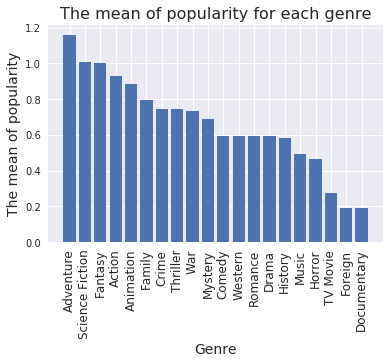

In [46]:

# gentarting a list of the loc or the index for each genre to be replaced by the tick 
locs = np.arange(len(labels))

plt.bar(locs, gen_pop)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('The mean of popularity', fontsize=14)

# Set text labels:
plt.xticks(locs, labels, fontsize=12, rotation=90)
plt.title('The mean of popularity for each genre', fontsize=16)
plt.show()

From the previous BarChat we can see that the genre with  the **highest** population avrage is __Adventure__ (1.1596) then __science fiction__ is the secand with population avrage **(1.009719)** and the **lowest** genre in avrage population is **_Documentary_** (0.188172).

### Research Question 2 does the number of movies for each year increase or decrease? and which genre have the largest number of movies?

In [47]:
df.groupby(df["release_year"])['original_title'].count()

release_year
1960      78
1961      75
1962      82
1963      91
1964     111
1965      94
1966     119
1967      96
1968      91
1969      78
1970     107
1971     129
1972      94
1973     140
1974     128
1975     114
1976     122
1977     144
1978     174
1979     142
1980     207
1981     198
1982     212
1983     208
1984     286
1985     274
1986     314
1987     331
1988     362
1989     367
1990     366
1991     362
1992     363
1993     475
1994     508
1995     480
1996     525
1997     522
1998     573
1999     574
2000     581
2001     655
2002     729
2003     738
2004     791
2005     931
2006    1035
2007    1101
2008    1223
2009    1339
2010    1189
2011    1263
2012    1259
2013    1367
2014    1445
2015    1372
Name: original_title, dtype: int64

In [48]:
# the number of movies in the first 5 years
df.groupby(df["release_year"])['original_title'].count().head(5).sum()

437

In [49]:
# the number of movies in the last 5 years

df.groupby(df["release_year"])['original_title'].count().tail(5).sum()

6706

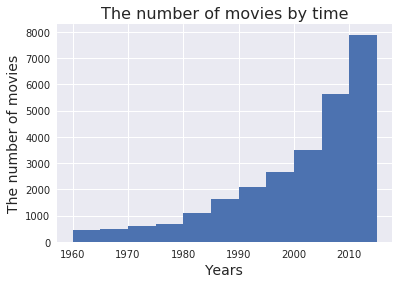

In [50]:

plt.hist(df["release_year"],bins=11);
plt.xlabel('Years', fontsize=14)
plt.ylabel('The number of movies', fontsize=14)
plt.title('The number of movies by time', fontsize=16)
plt.show()


From the previous histgram we can find that the number of movies **increasing** by time from 1960-2015 as in _1960-_ the number of movies is **437 movie** and _2010-2015_ the number of movies is **6706 movie**.

In [51]:
# geting the number of movies for each genre
nmovie = df.groupby(['genres'])["genres"].count().sort_values()
nmovie

genres
TV Movie            162
Western             164
Foreign             184
War                 268
History             330
Music               399
Documentary         470
Animation           662
Mystery             808
Fantasy             905
Family             1213
Science Fiction    1217
Crime              1353
Adventure          1463
Horror             1636
Romance            1708
Action             2371
Thriller           2902
Comedy             3775
Drama              4744
Name: genres, dtype: int64

In [52]:
# storing the generies in numpy array
uni_gen = nmovie.index
uni_gen

Index(['TV Movie', 'Western', 'Foreign', 'War', 'History', 'Music',
       'Documentary', 'Animation', 'Mystery', 'Fantasy', 'Family',
       'Science Fiction', 'Crime', 'Adventure', 'Horror', 'Romance', 'Action',
       'Thriller', 'Comedy', 'Drama'],
      dtype='object', name='genres')

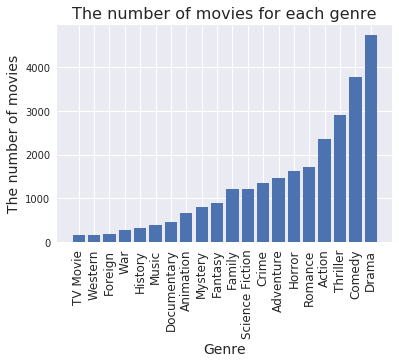

In [53]:

# gentarting a list of the loc or the index for each genre to be replaced by the tick 
locs = np.arange(len(uni_gen))
plt.bar(locs, nmovie)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('The number of movies', fontsize=14)

# Set text labels:
plt.xticks(locs, uni_gen, fontsize=12, rotation=90)
plt.title('The number of movies for each genre', fontsize=16)
plt.show()

From the previous BarChat we can see that the genre with  the **highest** number of movies for  __Drama genre__ **(4744 movie)** then __Comedy__ is the secand with number of movies equal to **(3775 movie)** and the **lowest number of movies** for  **_TV Movie_** **(162 movie)**.

### Research Question 3  how does the popularity and revenue differ between high  and low budget

by assuming :

*   the **high** budget movies are the budget **more** than the **mean**. 
*   the **low** budget movies are the budget **less** than the **mean**.







In [54]:
# getting the mean of the budget

budget_mean = df_pure['budget'].mean()
budget_mean

22507170.875282392

In [55]:
#the high budget condition
high_bud = df_pure['budget'] >= budget_mean
high_bud.sum()

2170

In [56]:
# the low budget condition
low_bud = df_pure['budget'] < budget_mean
low_bud.sum()

8556

#### popularity

$$
standardized = \frac{x - x̅}{σ}
$$

In [57]:
stand_pop = (df_pure['popularity']-df_pure['popularity'].mean())/df_pure['popularity'].std(ddof=0)



In [58]:
# the prop
high_bud_pop = stand_pop[high_bud]
high_bud_pop.count()

2170

In [59]:
low_bud_pop =  stand_pop[low_bud]
low_bud_pop.sum()

-1756.9045252805824

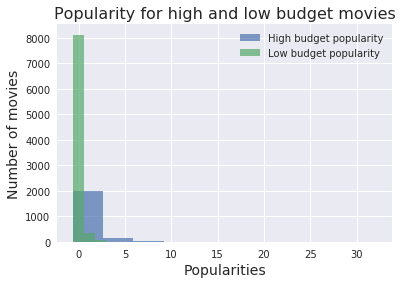

In [60]:
plt.hist(high_bud_pop, bins=10, alpha=0.7, label='High budget popularity')
plt.hist(low_bud_pop, bins=10, alpha=0.7, label='Low budget popularity')
plt.xlabel('Popularities', fontsize=14)
plt.ylabel('Number of movies', fontsize=14)
plt.title('Popularity for high and low budget movies', fontsize=16)
plt.legend()
plt.show()


From the previous histgram we can find that the most of low budget have **0-1** **popularity** they are about **8000 movies** but the most of **high budget movies** have **more** popularity **0-3** they are about 2000 movies. as well as **there smaller number of high budget movies** popularity **3-6** and **6-9**, however **the low budget movies** have aproximitly **zero movies** with popularity **greater than 3**.

#### revenue

In [61]:
stand_rev = (df_pure['revenue']-df_pure['revenue'].mean())/df_pure['revenue'].std(ddof=0)


In [62]:
high_bud_rev= stand_rev[high_bud]
high_bud_rev.sum()

1904.3371136705432

In [63]:
low_bud_rev= stand_rev[low_bud]
low_bud_rev.sum()

-1904.337113670543

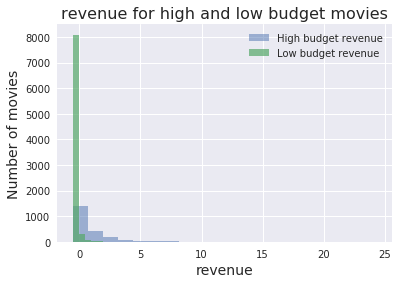

In [64]:
plt.hist(high_bud_rev, bins=20, alpha=0.5, label='High budget revenue')
plt.hist(low_bud_rev, bins=20, alpha=0.7, label='Low budget revenue')
plt.xlabel('revenue', fontsize=14)
plt.ylabel('Number of movies', fontsize=14)
plt.title('revenue for high and low budget movies', fontsize=16)
plt.legend()
plt.show()


From the previous histgram we can find that the most of low budget have **-1-0 million dollars** **revenue** they are about **8000 movies** and about **250 movie** makes from **0-1 million dollars** but the most of **high budget movies** makes **more** revenue **-1-3**  million dollars they are about 1500 movies. as well as **there smaller number of high budget movies** revenue **3-4** and **5-9** million dollars, however **the low budget movies** have aproximitly **zero movies** with revenue **greater than 3** million dollars.

### Research Question 4: Who are top 10 super stars accourding to avrage movie rating and what are the voting for the best  votung movies? 








In [65]:
df_pure.head()

,id,popularity,budget,revenue,original_title,super_star,director,runtime,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,Colin Trevorrow,124,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy,George Miller,120,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley,Robert Schwentke,119,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel,James Wan,137,2947,7.3,2015


To get the largest vote_count and vote_average i have multiplied them to get the highest value possible in voting_score column then append it.

In [66]:
df_pure['voting_score'] = df_pure['vote_count'] * df_pure['vote_average'] 


In [67]:
top_super = df_pure.sort_values(by='voting_score', ascending=False).head(10)
top_super

,id,popularity,budget,revenue,original_title,super_star,director,runtime,vote_count,vote_average,release_year,voting_score
1919,27205,9.363643,160000000.0,8.255000e+08,Inception,Leonardo DiCaprio,Christopher Nolan,148,9767,7.9,2010,77159.3
2875,155,8.466668,185000000.0,1.001922e+09,The Dark Knight,Christian Bale,Christopher Nolan,152,8432,8.1,2008,68299.2
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.,Joss Whedon,143,8903,7.3,2012,64991.9
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington,James Cameron,162,8458,7.1,2009,60051.8
4364,68718,5.944518,100000000.0,4.253682e+08,Django Unchained,Jamie Foxx,Quentin Tarantino,165,7375,7.7,2012,56787.5
629,157336,24.949134,165000000.0,6.217525e+08,Interstellar,Matthew McConaughey,Christopher Nolan,169,6498,8.0,2014,51984.0
4363,49026,6.591277,250000000.0,1.081041e+09,The Dark Knight Rises,Christian Bale,Christopher Nolan,165,6723,7.5,2012,50422.5
2410,603,7.753899,63000000.0,4.635174e+08,The Matrix,Keanu Reeves,Lilly Wachowski|Lana Wachowski,136,6351,7.8,1999,49537.8
4178,278,7.192039,25000000.0,2.834147e+07,The Shawshank Redemption,Tim Robbins,Frank Darabont,142,5754,8.4,1994,48333.6
2409,550,8.947905,63000000.0,1.008538e+08,Fight Club,Edward Norton,David Fincher,139,5923,8.1,1999,47976.3


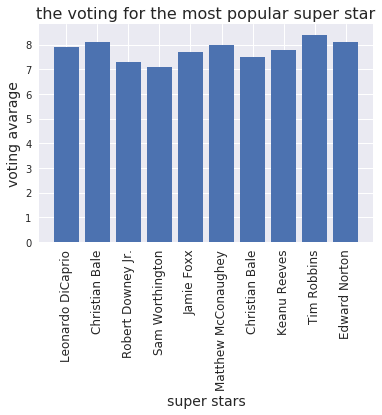

In [68]:
labels = top_super['super_star']
# gentarting a list of the loc or the index for each genre to be replaced by the tick 
locs = np.arange(len(labels))

plt.bar(locs, top_super['vote_average'])
plt.xlabel('super stars', fontsize=14)
plt.ylabel('voting avarage', fontsize=14)

# Set text labels: "I can use also the label np list two time instead making this list"
plt.xticks(locs, labels, fontsize=12, rotation=90)
plt.title('the voting for the most popular super star', fontsize=16)
plt.show()

From the previous BarChat we can see that the top voted **superstar** accourding to voting score is **Leonardo DiCaprio** with **7.9 voting average** and **9767 vote count** and the lowest of the top 10 is **Edward Norton** with voting average **8.1** and vote count **1999**

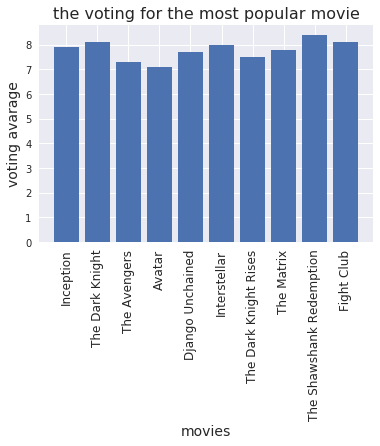

In [69]:
labels = top_super['original_title']
# gentarting a list of the loc or the index for each genre to be replaced by the tick 
locs = np.arange(len(labels))

plt.bar(locs, top_super['vote_average'])
plt.xlabel('movies', fontsize=14)
plt.ylabel('voting avarage', fontsize=14)

# Set text labels: "I can use also the label np list two time instead making this list"
plt.xticks(locs, labels, fontsize=12, rotation=90)
plt.title('the voting for the most popular movie', fontsize=16)
plt.show()

From the previous BarChat we can see that the top voted **movie** accourding to voting score is **Inception** with **7.9 voting average** and **9767 vote count** and the lowest of the top 10 is **Fight Club** with voting average **8.1** and vote count **1999**

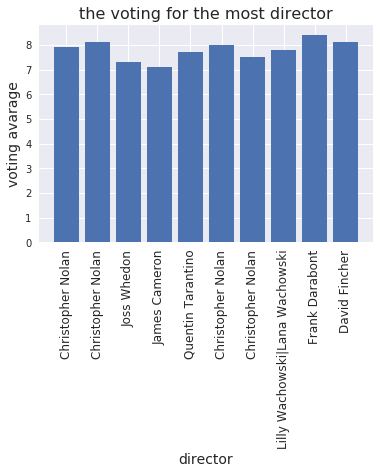

In [70]:
labels = top_super['director']
# gentarting a list of the loc or the index for each genre to be replaced by the tick 
locs = np.arange(len(labels))

plt.bar(locs, top_super['vote_average'])
plt.xlabel('director', fontsize=14)
plt.ylabel('voting avarage', fontsize=14)

# Set text labels: "I can use also the label np list two time instead making this list"
plt.xticks(locs, labels, fontsize=12, rotation=90)
plt.title('the voting for the most director', fontsize=16)
plt.show()

From the previous BarChat we can see that the top voted **director** accourding to voting score is **Christopher Nolan** with **7.9 voting average** and **9767 vote count** and the lowest of the top 10 is **David Fincher** with voting average **8.1** and with **1999** votes.

### Research Question 5: What's the genre that have the longest movies

In [71]:
run_time = df.groupby('genres')['runtime'].mean().sort_values(ascending=False)
labels = run_time.index
run_time

genres
History            134.336364
War                127.753731
Western            114.871951
Drama              110.529089
Foreign            107.016304
Romance            106.990632
Crime              106.926829
Adventure          106.466165
Mystery            106.069307
Music              105.699248
Action             105.247575
Documentary        103.970213
Thriller           103.288077
Fantasy            101.282873
Science Fiction    100.003287
Comedy              96.936424
Horror              94.426039
TV Movie            93.271605
Family              90.183842
Animation           70.758308
Name: runtime, dtype: float64

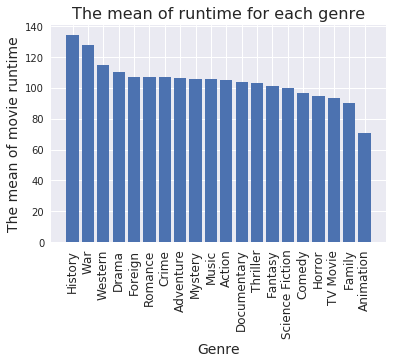

In [72]:

# gentarting a list of the loc or the index for each genre to be replaced by the tick 
locs = np.arange(len(labels))

plt.bar(locs, run_time)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('The mean of movie runtime', fontsize=14)

# Set text labels:
plt.xticks(locs, labels, fontsize=12, rotation=90)
plt.title('The mean of runtime for each genre', fontsize=16)
plt.show()

From the previous BarChat we can see that **the genre that have the longest average movies** is **history** with **134.3** minutes, then **war** with ** 127.75** minutes long and **Western** with ** 114.87** minutes long  however the genre has the shorter movies is **animation** with **70.76** minutes long.

<a id='conclusions'></a>
## Conclusions

> **Adventure** is the most popular genre with **1.1596** average popularity and the **Documentary**  is the less popular genre **0.18817**.
> 
> The number of moves inceases by time from **1960 to 2015** the number of movies increased from **78-1372**.
>
> **Drama** genre has the largest number of movies which is **4744** but **TV Movies** genre has the smallest number of movies which is **162**.
>
> the most part of the low budget is so low popularity however the high budget gets more popularity. 
> 
> the number of movies of low budget much higher than high budget.
>
> the most low bufdget movies are making so slow revenue from -1-0(according to the histogram).
>
>  The most votedd movie is  an action movie , with name inception for the superstar leonardo DiCaprio and the dirctor is christopher Nolan. 
>
> The **history** genre  has the **longest average movie runtime** about **134 miinutes**. 


## Limitations
>  there's **50% to 55%** of revenue and budget data is having **zero values** we can count them as a missing value because they can't be zero. 
> I have replaced them with the mean of each but this may lead to inaccurate predictions or biased analysis.
>
> I have removed about 147 rows of the dataset due to the null values.
>

### Resourses 

>1- [How do I split text in a column into multiple rows?](https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows)
>
> 2- in polting the data with matplotlib to make the ticks [tutorial](https://matplotlib.org/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py)
and [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html#matplotlib.pyplot.xticks).
>
> 3- activating the seaborn form this video [at youtube](https://youtu.be/snkkKrek7TU?t=122)

# Thanks for reviewing my project.

I would be happy to keep in touch with you.

>LinkedIn :[@AbdElrhman-m]('https://www.linkedin.com/in/abdelrhman-m/')
>
>Email : AbdElrhman.m056@gmail.com